<a href="https://colab.research.google.com/github/wahyuazizi/Predictive_Analysis_ML_Dicoding/blob/main/Predicitve_Analysis_Vehicle_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

brsahan_vehicle_co2_emissions_dataset_path = kagglehub.dataset_download('brsahan/vehicle-co2-emissions-dataset')
jeleeladekunlefijabi_ship_fuel_consumption_and_co2_emissions_analysis_path = kagglehub.dataset_download('jeleeladekunlefijabi/ship-fuel-consumption-and-co2-emissions-analysis')
wahyuazizi_kagglesjson_path = kagglehub.dataset_download('wahyuazizi/kagglesjson')

print('Data source import complete.')


In [ ]:
# !pip install --upgrade seaborn pandas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import kagglehub
import os

# Data Understanding

## Data Loading

In [ ]:
# Download
path = kagglehub.dataset_download("brsahan/vehicle-co2-emissions-dataset")

print("path dataset: ", path)

path dataset:  /kaggle/input/vehicle-co2-emissions-dataset


In [ ]:
# Cek list file dalam path
files = os.listdir(path)
print("daftar file dalam path:")
for file in files:
    print(file)

daftar file dalam path:
co2.csv


In [ ]:
# Load dataset
df = pd.read_csv(f"{path}/{file}", low_memory=False)
print(df.shape)

pd.set_option('display.max_columns', None)
df.head()

(7385, 12)


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Dari hasil diatas diperoleh:
* total record sebanyak
* terdapat

## Exploratory Data Analysis

### EDA - Deskripsi Variabel

| Nama Kolom                          | Deskripsi                                                                 |
|-------------------------------------|---------------------------------------------------------------------------|
| Make                                | Merek atau produsen kendaraan (contoh: Toyota, Ford, BMW).               |
| Model                               | Model spesifik kendaraan.                                                |
| Vehicle Class                       | Klasifikasi kendaraan berdasarkan ukuran dan penggunaan (contoh: SUV, Sedan). |
| Engine Size(L)                      | Volume kapasitas mesin dalam liter.                                      |
| Cylinders                           | Jumlah silinder pada mesin kendaraan.                                    |
| Transmission                        | Jenis transmisi kendaraan (contoh: Otomatis, Manual).                    |
| Fuel Type                           | Jenis bahan bakar yang digunakan oleh kendaraan.                         |
| Fuel Consumption City (L/100 km)    | Konsumsi bahan bakar di area perkotaan dalam liter per 100 kilometer.    |
| Fuel Consumption Hwy (L/100 km)     | Konsumsi bahan bakar di jalan raya dalam liter per 100 kilometer.        |
| Fuel Consumption Comb (L/100 km)    | Konsumsi bahan bakar gabungan (rata-rata kota dan jalan raya) dalam liter per 100 kilometer. |
| Fuel Consumption Comb (mpg)         | Konsumsi bahan bakar gabungan dalam mil per galon (mpg).                 |
| CO2 Emissions(g/km)                 | Emisi karbon dioksida per kilometer (target prediksi).                   |

### Penjelasan Fuel Type:
- **X**: Bensin biasa (regular gasoline)  
- **Z**: Bensin premium (premium gasoline)  
- **D**: Diesel  
- **E**: E85 (campuran bensin dan etanol)  
- **N**: Gas alam (natural gas)  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

### EDA - Cleaning Data

#### Menangani Missing Value

In [ ]:
print("Daftar Missing Value:\n", df.isnull().sum())

Daftar Missing Value:
 Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


#### Menangani Outliers

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns

n_cols = 2
n_rows = (len(numerical_features) + n_cols -1) // n_cols

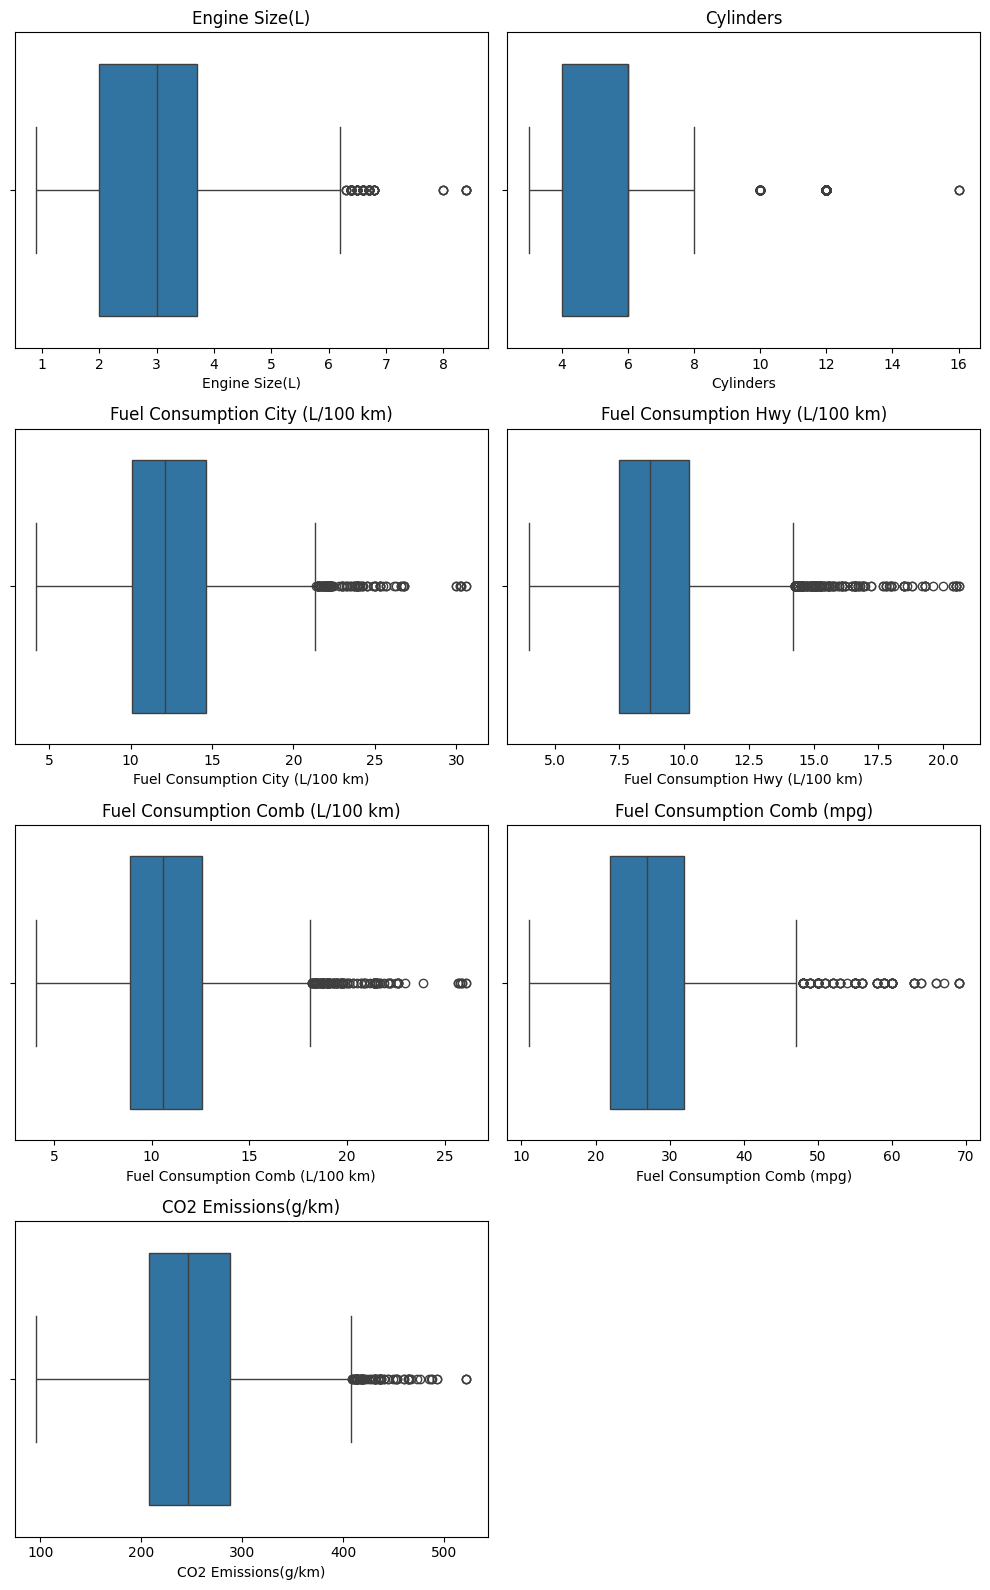

In [ ]:
# setup figure dengan subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))

axes = axes.flatten()
for i in range(len(numerical_features)):
    sns.boxplot(ax=axes[i], x=df[numerical_features[i]])
    axes[i].set_title(numerical_features[i])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
numerical_features = df.select_dtypes(include=['number'])

Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1

# Menyaring outlier berdasarkan IQR
df = df[~((numerical_features < (Q1 - 1.5 * IQR)) | (numerical_features > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df.shape

(6826, 12)

### EDA - Univariate Analysis

#### Categorical Features

In [ ]:
categorical_features = df.select_dtypes(include=['object'])

In [ ]:

def plot_feature_distribution(features, ax, top_n=10):
    # Calculate value counts and percentages
    count = df[features].value_counts().head(top_n)
    percent = 100 * df[features].value_counts(normalize=True).head(top_n)
    df_summary = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})

    # Plot the bar chart on the provided axis (ax)
    count.plot(kind='bar', ax=ax, title=f"Distribusi untuk {features} (Top {top_n} If Category>{top_n})")
    ax.set_xticklabels(count.index, rotation=45, ha='right')
    ax.set_ylabel("Jumlah Sampel")
    ax.set_xlabel(features)

    # Annotate the bars with percentage values
    # for p in ax.patches:
    for p, perc in zip(ax.patches, percent):
        height = p.get_height()
        # x = p.get_x() + p.get_width() / 2  # Get x-coordinate for the label
        ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{perc:.1f}%',
                ha='center', fontsize=10)


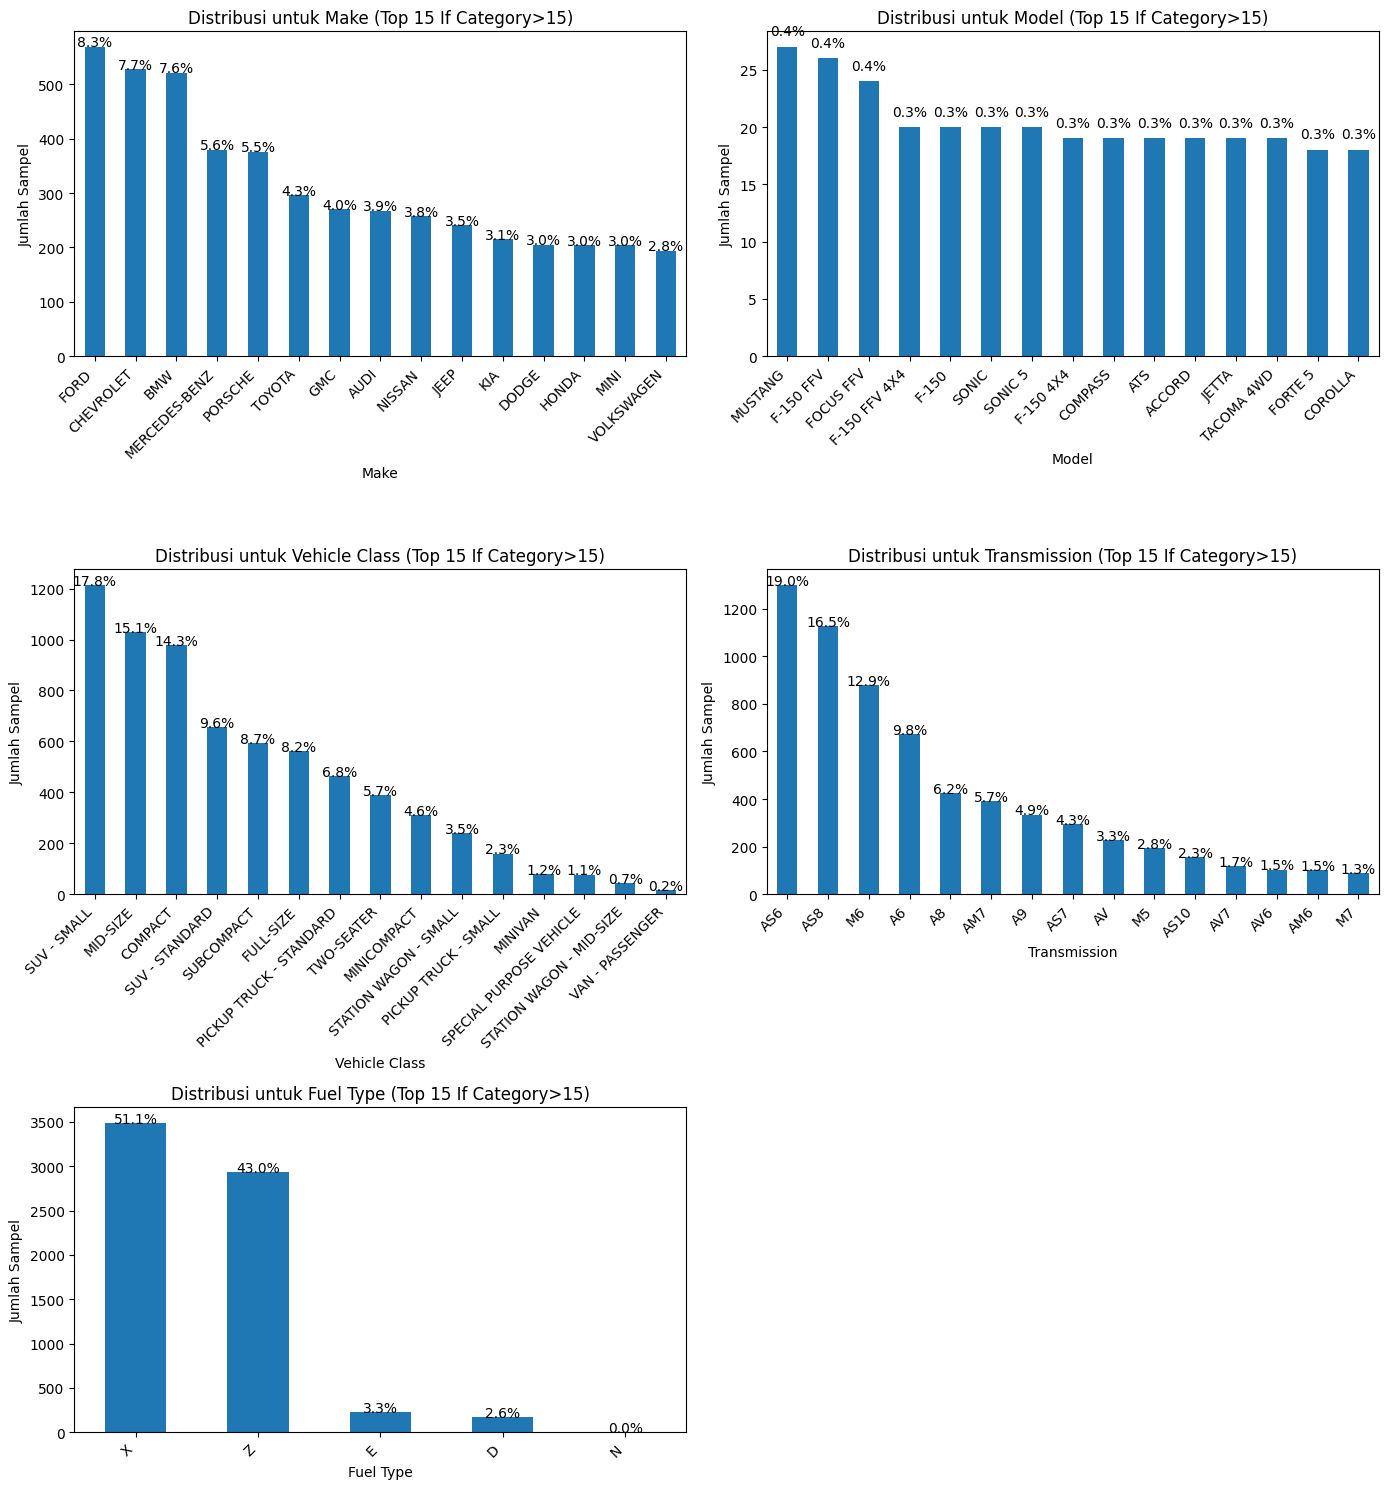

In [ ]:
# Create a new figure with multiple subplots
n_cols = 2  # Tentukan jumlah kolom
n_rows = (len(categorical_features.columns) + n_cols - 1) // n_cols  # Menentukan jumlah baris secara otomatis
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))  # Sesuaikan ukuran figure

# Flatten axes array untuk mempermudah indexing
axes = axes.flatten()

# Loop melalui fitur kategorikal dan plot
for i, feature in enumerate(categorical_features.columns):
    plot_feature_distribution(feature, axes[i], top_n=15)

# Menghapus subplot yang tidak terpakai jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Sesuaikan tata letak agar lebih rapat
plt.show()


#### Numerical Features

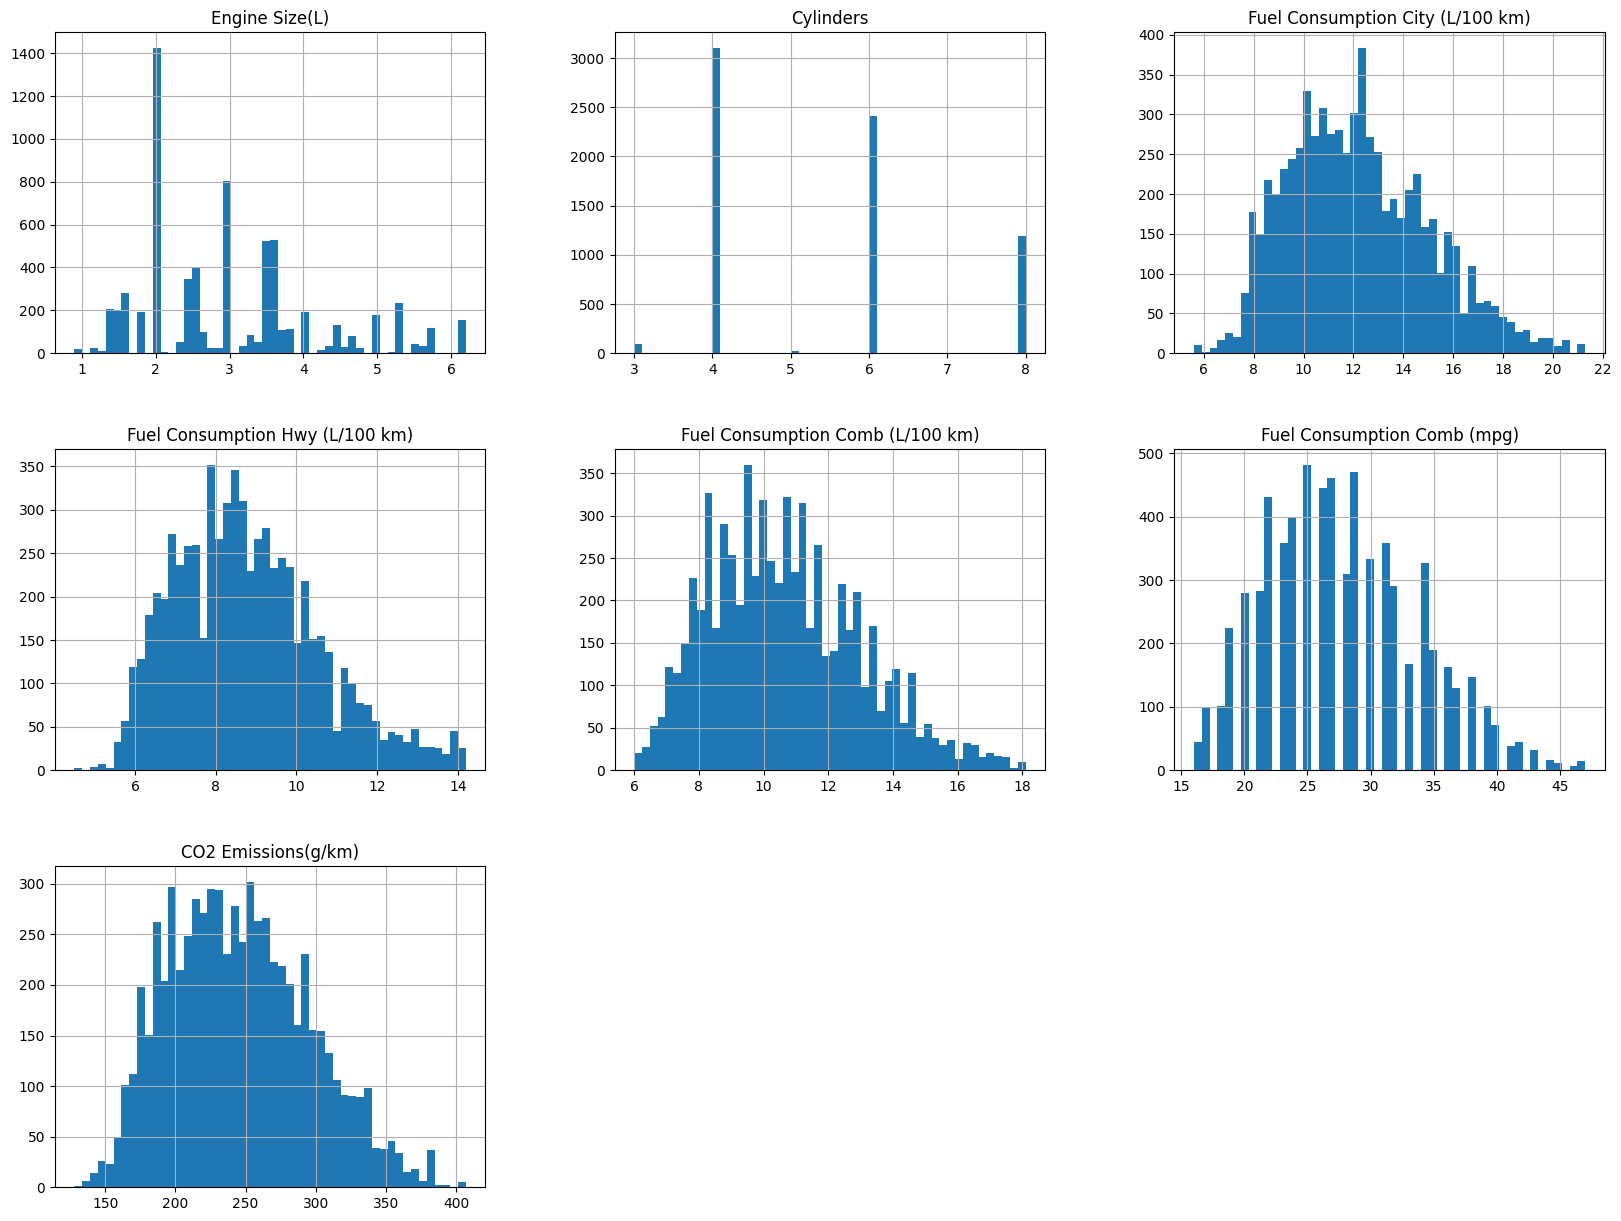

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### EDA - Multivariate Analysis

#### Categorical Features

In [ ]:
df.drop("Model", axis=1, inplace=True)

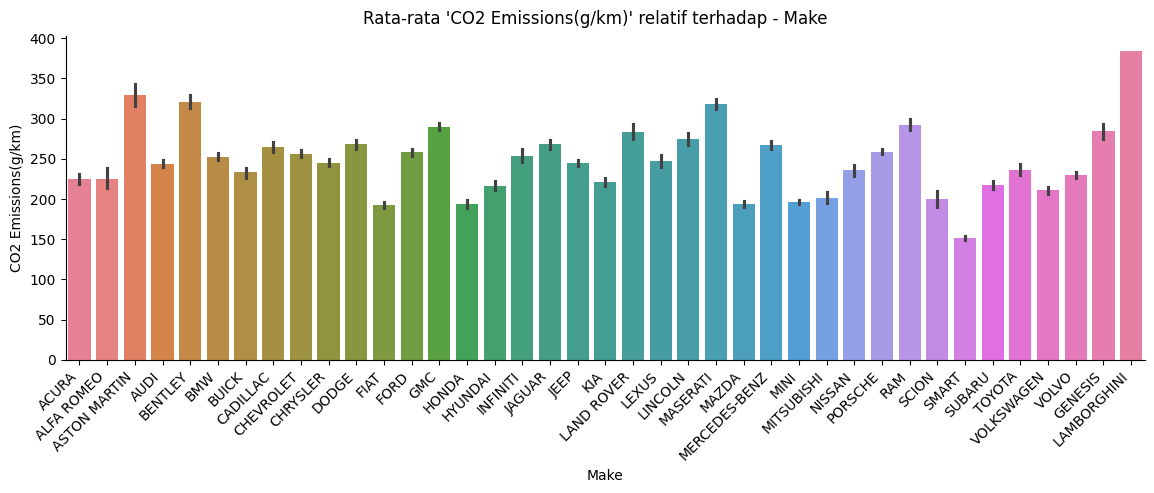

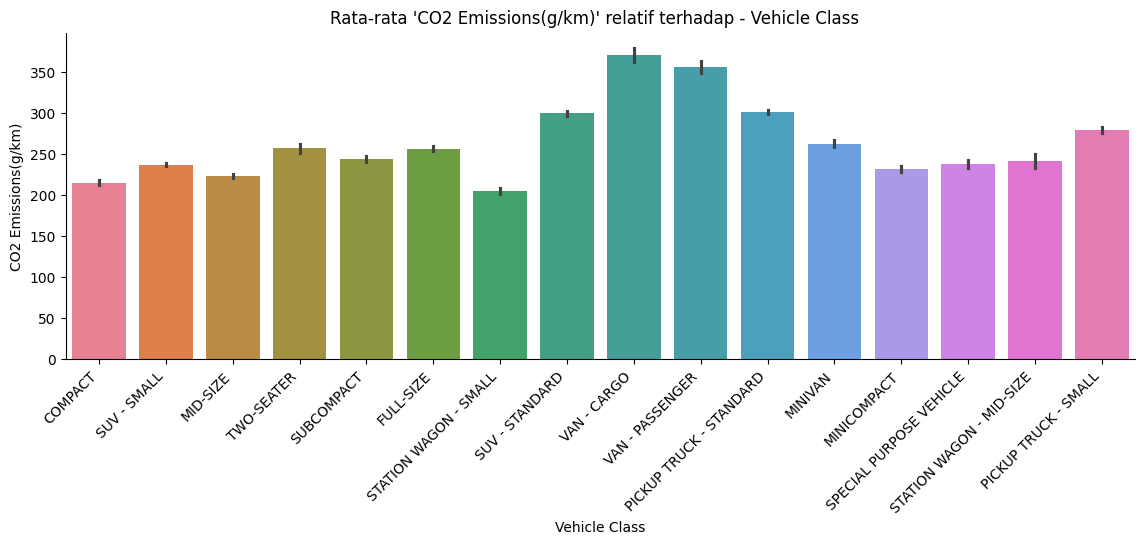

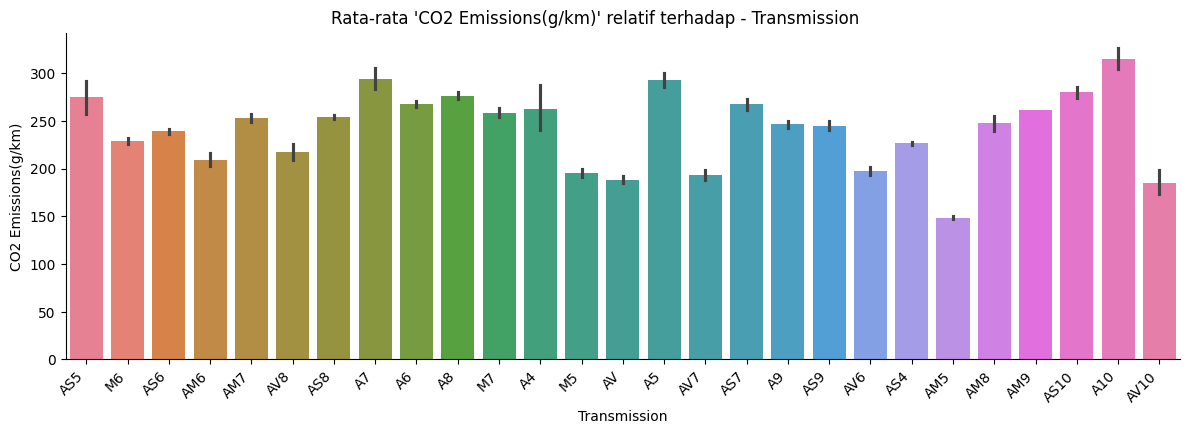

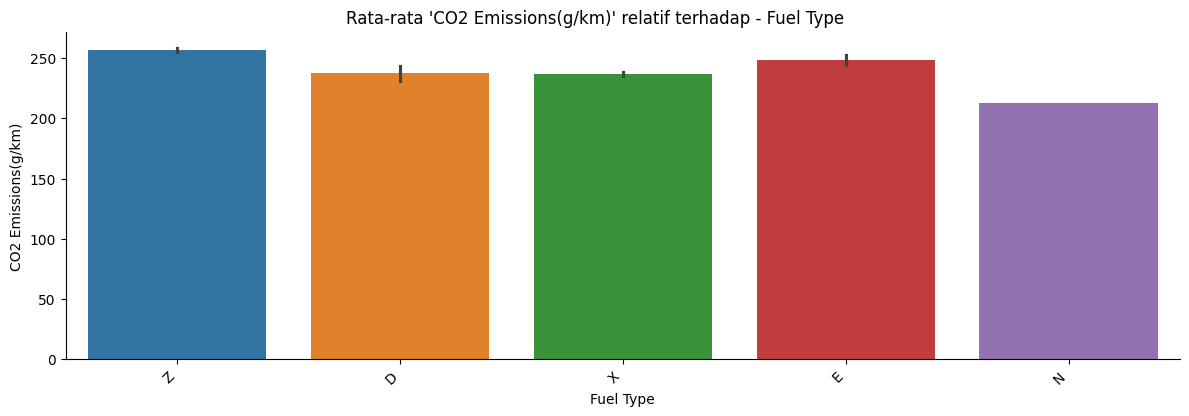

In [ ]:
y = ['CO2 Emissions(g/km)']
x = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']

for f in y:
    for col in x:
        # Buat catplot
        g = sns.catplot(
            data=df, x=col, y=f, kind='bar', dodge=False, height=4, aspect=3, hue=col
        )
        # Tambahkan judul
        g.fig.suptitle(f"Rata-rata '{f}' relatif terhadap - {col}", y=1.02)
        # Rotasi sumbu x dengan benar
        for label in g.ax.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')

        # Tampilkan plot
        plt.show()

#### Numerical Features

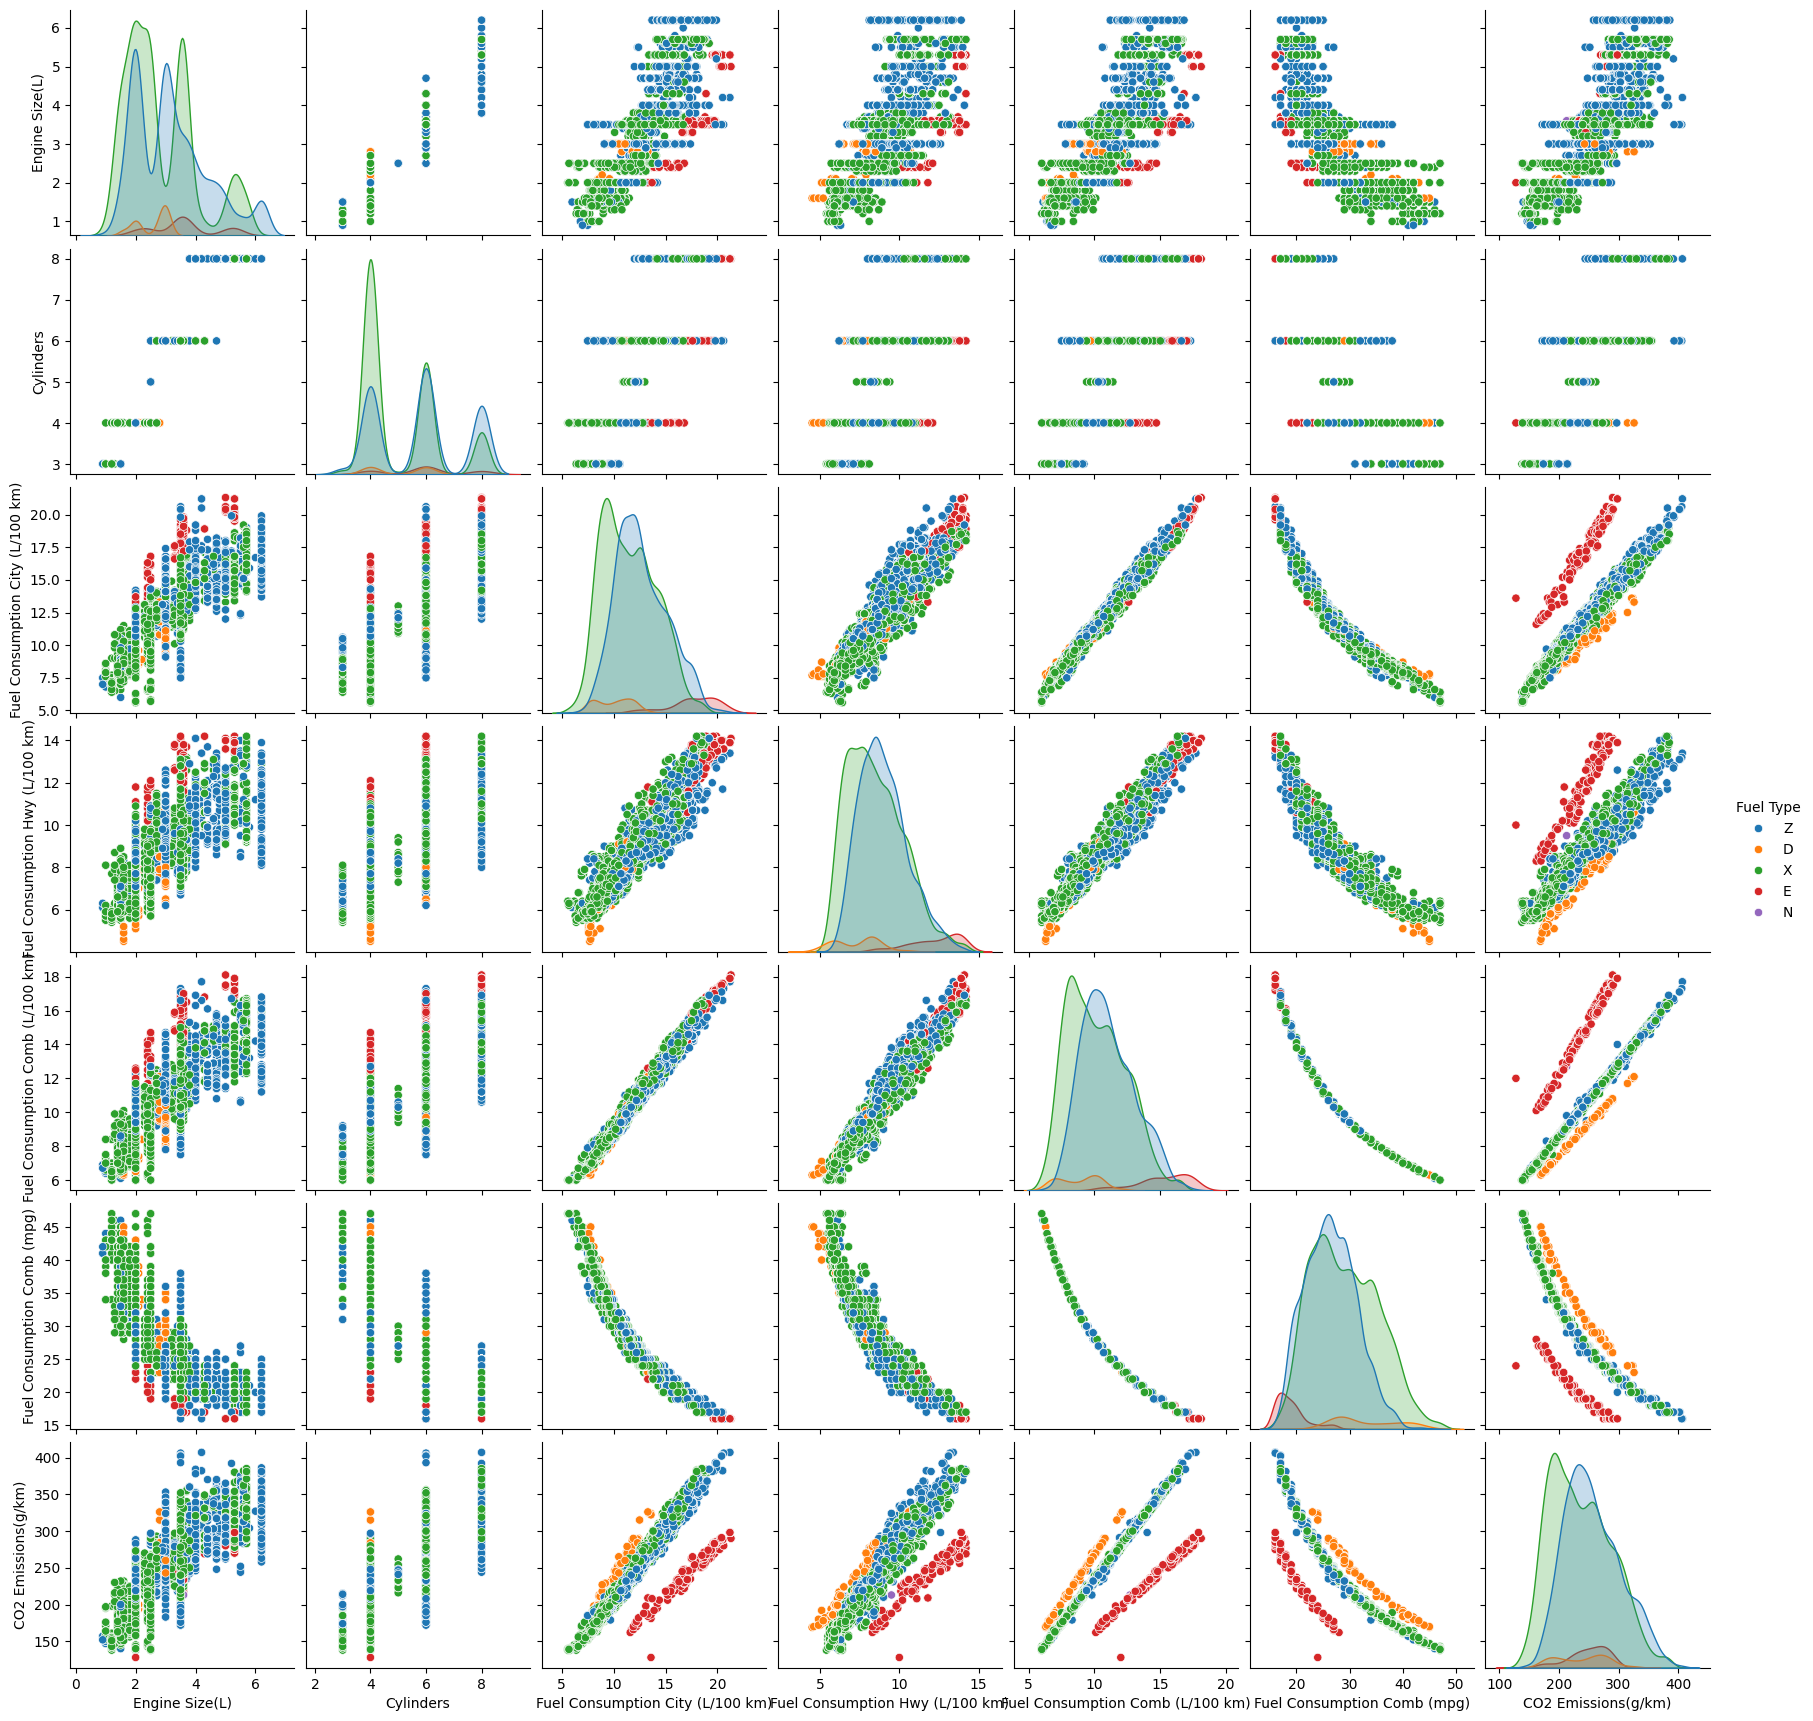

In [ ]:
sns.pairplot(df, diag_kind='kde', hue="Fuel Type")
plt.show()

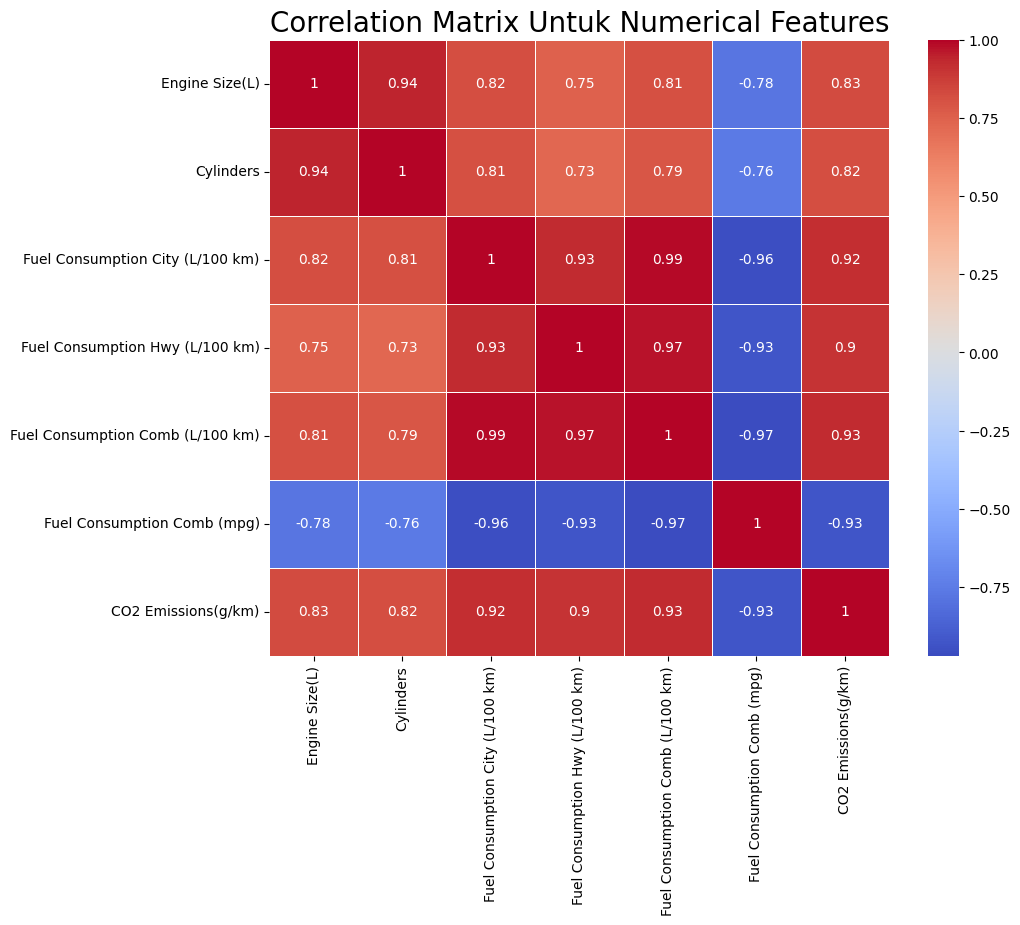

In [ ]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(10,8))

corr_matrix = df[numerical_features].corr().round(2)
#gunakan annot=True untuk menampilkan nilai dalam kotak
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Correlation Matrix Untuk Numerical Features", size=20)
plt.show()

# Data Preparation

## Encoding Fitur Kategori

In [ ]:
from sklearn.preprocessing import OneHotEncoder

fitur = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']
for i in fitur:
    # Buat one-hot encoding dan ubah tipe menjadi integer eksplisit
    dummies = pd.get_dummies(df[i], prefix=f'{i}').astype(int)
    df = pd.concat([df, dummies], axis=1)
    df.drop(i, axis=1, inplace=True)

df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FIAT,Make_FORD,Make_GENESIS,Make_GMC,Make_HONDA,Make_HYUNDAI,Make_INFINITI,Make_JAGUAR,Make_JEEP,Make_KIA,Make_LAMBORGHINI,Make_LAND ROVER,Make_LEXUS,Make_LINCOLN,Make_MASERATI,Make_MAZDA,Make_MERCEDES-BENZ,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_PORSCHE,Make_RAM,Make_SCION,Make_SMART,Make_SUBARU,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Vehicle Class_COMPACT,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Transmission_A10,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,3.5,6,11.9,7.7,10.0,28,230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Reduksi Dimensi dengan PCA

In [ ]:
from sklearn.decomposition import PCA

fuel_features = ["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)"]
pca = PCA(n_components=4, random_state=123)
pca.fit(df[fuel_features])
princ_comp = pca.transform(df[fuel_features])

In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.98 , 0.015, 0.006, 0.   ])

In [ ]:
pca = PCA(n_components=1, random_state=123)
pca.fit(df[fuel_features])
df['dimension'] = pca.transform(df.loc[:, (fuel_features)]).flatten()
df.drop(fuel_features, axis=1, inplace=True)

In [ ]:
df.head()

,Engine Size(L),Cylinders,CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FIAT,Make_FORD,Make_GENESIS,Make_GMC,Make_HONDA,Make_HYUNDAI,Make_INFINITI,Make_JAGUAR,Make_JEEP,Make_KIA,Make_LAMBORGHINI,Make_LAND ROVER,Make_LEXUS,Make_LINCOLN,Make_MASERATI,Make_MAZDA,Make_MERCEDES-BENZ,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_PORSCHE,Make_RAM,Make_SCION,Make_SMART,Make_SUBARU,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Vehicle Class_COMPACT,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Transmission_A10,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,dimension
0,2.0,4,196,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6.450936
1,2.4,4,221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2.029099
3,3.5,6,255,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-2.692208
4,3.5,6,244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.540251
5,3.5,6,230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.800417


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['CO2 Emissions(g/km)'], axis= 1)
y = df['CO2 Emissions(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 6826
Total # of sample in train dataset: 5460
Total # of sample in test dataset: 1366


## Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ["Engine Size(L)",	"Cylinders", "dimension"]
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Engine Size(L),Cylinders,dimension
3563,1.899959,1.735222,-0.990789
4557,-0.175643,-0.921437,0.292441
1099,-0.839836,-0.921437,0.127000
6402,-0.839836,-0.921437,0.891527
2714,-1.254956,-0.921437,2.191797


In [ ]:
X_train[numerical_features].describe().round(4)

,Engine Size(L),Cylinders,dimension
count,5460.0000,5460.0000,5460.0000
mean,-0.0000,-0.0000,0.0000
std,1.0001,1.0001,1.0001
min,-1.7531,-1.5856,-2.3786
25%,-0.8398,-0.9214,-0.7621
50%,-0.0096,0.4069,-0.0547
75%,0.4885,0.4069,0.7301
max,2.6472,1.7352,2.8956


# Model Development

## Model Development dengan KNN

In [ ]:
# Menyiapkan dataframe untuk analisis
model = pd.DataFrame(index=['train_mse', 'test_mse'], columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

model.loc['train_mse', 'knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Model Development dengan Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, max_depth=20, random_state=321, n_jobs=-1)
RF.fit(X_train, y_train)

model.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred = RF.predict(X_train), y_true=y_train)

## Model DEvelopment dengna Boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=321)
boosting.fit(X_train, y_train)

model.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [ ]:
# Pastikan kolom numerik di X_test diubah menjadi float terlebih dahulu
X_test[numerical_features] = X_test[numerical_features].astype(float)

# Scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
numerical_features = list(numerical_features)

# Lakukan scaling pada data numerik
scaled_values = scaler.transform(X_test[numerical_features])

# Buat DataFrame dari hasil transformasi dengan tipe data konsisten
scaled_df = pd.DataFrame(scaled_values, columns=numerical_features, index=X_test.index)

# Gantikan kolom lama dengan kolom baru yang sudah diskalakan
X_test.loc[:, numerical_features] = scaled_df


In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN':knn, 'RF':RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,0.08504,0.104953
RF,0.002115,0.008827
Boosting,0.149759,0.156366


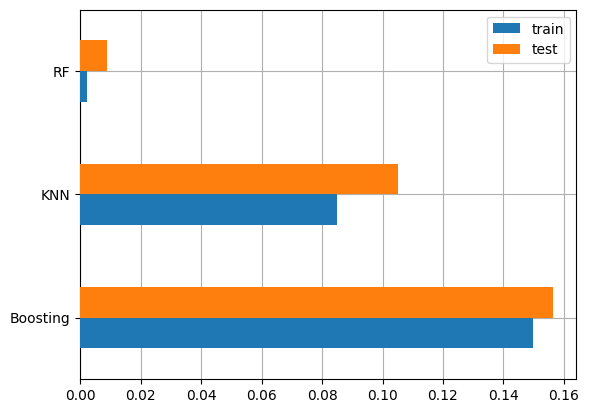

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true': y_test[:1]}

for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
6263,261,265.1,260.1,268.5
